<a href="https://colab.research.google.com/github/RPFey/XJTU_NEW/blob/main/%E5%9B%BE%E5%83%8F%E5%A4%84%E7%90%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 图片处理

简单介绍 Python 用于处理图片的库:

* [OpenCV](https://opencv.org/)

OpenCV 是由 Intel 开发的开源计算机视觉库。(Open Computer Vision)。用 C++ 语言编写，并且移植到了 Python 语言。目前有两个主要版本 OpenCV 3.X 与 OpenCV 4.X 两者在 API 方面有差别。我们使用是 OpenCV 4.X

* [PIL]

## 计算机中的图片

计算机中的图片为一个多维数组。一般形式为 $[H, W, C]$，$H$是图像的高，$W$是图像的宽。$C$ 代表通道(Channel)，彩色图是三通道($C=3$，分别为 **R**ed, **G**reen, **B**lue)，灰色图是单通道。

> 图片的原始数据也会是四通道 rgba，a 代表透明度。

[图片坐标系示例]

令 $f(x, y)$ 代表 $(x, y)$ 处像素值。

In [1]:
#@markdown 导入库

import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
from IPython.display import YouTubeVideo

## 图片读取

OpenCV 读取的颜色顺序为 BGR **与 RGB 不同**。

--2021-05-21 13:15:58--  https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘lena.png’

lena.png            100%[===================>] 462.73K  --.-KB/s    in 0.08s   

2021-05-21 13:15:58 (5.93 MB/s) - ‘lena.png’ saved [473831/473831]



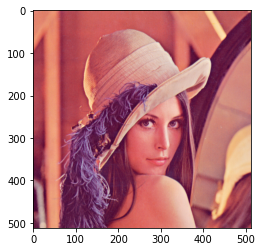

In [2]:
!wget https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png -O lena.png

img = cv2.imread('lena.png')

plt.figure()
plt.imshow(img[:, :, ::-1]) # Matplotlib 展示时需要将图片通道顺序反过来
plt.show()

In [3]:
# OpenCV读取的图片为 numpy.ndarray 格式
print("Data type: ", type(img))

# 查看图片的维度
print("Image shape: ", img.shape)

# 访问位于 x=10, y=20 像素点
print("Pixel value in BGR: ", img[20, 10])

Data type:  <class 'numpy.ndarray'>
Image shape:  (512, 512, 3)
Pixel value in BGR:  [110 132 230]


## 色彩空间

* RGB

一般看到的彩色图片都是 RGB 三通道图片，或者叫 RGB 空间，如图所示。三个维度分别代表 Red, Green, Blue，取值在 0~255 （8 位）。

> 再次强调：OpenCV 读取的图片时 BGR ，与 RGB 相反！

![](https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/RGB_color_solid_cube.png/440px-RGB_color_solid_cube.png)

* 灰度图

只有一个通道，代表图像的亮度(Intensity)。灰度计算有多种方式，比如平均：

$$
(R + G + B) / 3
$$

或者，由于人眼对绿光更敏感，所以采用加权平均

$$
(0.21 R + 0.72 G + 0.07 B)
$$

一般处理图像时都会将图像转换为灰度图，因为灰度图仅有一个通道，是一个二维数组。（彩色的 RGB 是三维）再提取边缘，轮廓做进一步分析。

* HSV

HSV 空间 (Hue, Saturation, Brightness). H(Hue) 色相：是色彩基本属性，也就是颜色，例如：红色，黄色。S(Saturation) 饱和度：指色彩的纯度。越高色彩越纯，越低色彩越灰暗。V 亮度。 HSV 可以看成是沿着上面 RGB 立方体的对角线看去（由 (255, 255, 255) --> (0, 0, 0)），建立一个柱坐标系。如下图所示

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/HSV_cone.png/440px-HSV_cone.png)

HSV 多用来分析图片中的色彩。

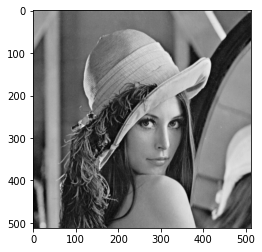

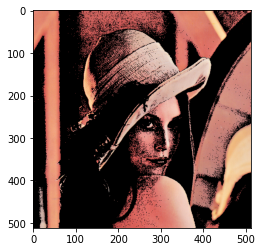

In [32]:
# 转换为 灰度图
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure()
plt.imshow(gray, cmap='gray')
plt.show()

# 转换为 HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = np.split(hsv, 3, axis=2)

# 我们只提取原图中的红色区域
mask = np.zeros_like(h)
mask[np.nonzero(h<30)] = 1
img_red = img * mask
plt.figure()
plt.imshow(img_red[:, :, ::-1])
plt.show()

## 单像素点变换

Video available at https://youtube.com/watch?v=f-5l8Cdcb8k


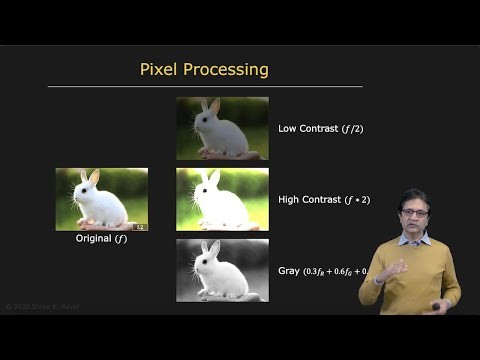

In [ ]:
#@title 视频: 单像素点处理
video = YouTubeVideo(id="f-5l8Cdcb8k", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)

video

补充： 直方图均衡化 (Histogram Equalization)

有时，图片中有过多太亮或者太暗的点，主要分布在两端。此时希望像素值能够均匀分布。这就需要用到直方图均衡化。直方图均衡化的原理是来自概率论，任何一个分布的累计分步都是 0~1 之间的均匀分布。

记

$$
Y = F(y) = P(X \leq y)
$$

Y 的累计分布

$$
\begin{aligned}
P(Y \leq y) &=  P(F(x) \leq y) \\
        &= P(x \leq F^{-1}(y)) \\
        &= F(F^{-1}(y)) \\
        &= y
\end{aligned}
$$

为均匀分布。

* 实现过程

对一个分布$h(I)$，首先计算它的累计分布

$$
c(I) = \frac{1}{N}\sum_{i=0}^{I}h(i) = c(I-1) + \frac{1}{N}h(I)
$$

对于任何一个像素点，如果它的值为 $I$, 那么就将其替换为 $c(I)$

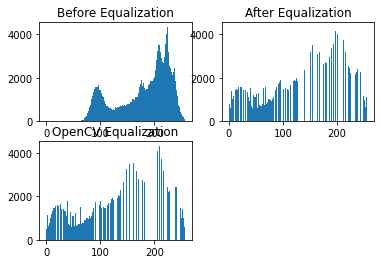

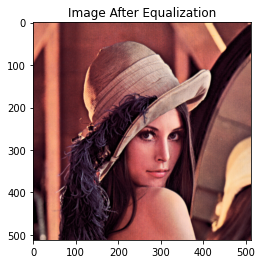

In [26]:
def EqualHist(img: np.ndarray):
  """
  直方图均衡化实现
  
  Input：
    img: (np.ndarray) (H, W) (np.uint8)
       二维数组
  """
  hist, edge = np.histogram(img, bins=range(257), density=True) # 由于像素值是 [0, 255]，需要划分为 [0, 1), ... [255, 256)，因此 Range 为 257
  accum_hist = np.cumsum(hist)
  equal_img = np.zeros_like(img, dtype=np.uint8)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      equal_img[i, j] = np.floor(accum_hist[img[i, j]] * 255)
  return equal_img

# 一般是对亮度(HSV 中的 V)进行直方图均衡
equal_v = EqualHist(v)

# 采用 OpenCV 处理
equal_v_OpenCV = cv2.equalizeHist(v)

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.hist(v.flatten(), range(257))
ax1.set_title("Before Equalization")

ax2 = fig.add_subplot(222)
ax2.hist(equal_v.flatten(), range(257))
ax2.set_title("After Equalization")

ax3 = fig.add_subplot(223)
ax3.hist(equal_v_OpenCV.flatten(), range(257))
ax3.set_title("OpenCV Equalization")
fig.show()

new_hsv = np.concatenate([h, s, equal_v], axis=2)
new_img = cv2.cvtColor(new_hsv, cv2.COLOR_HSV2RGB)

plt.figure()
plt.imshow(new_img)
plt.title("Image After Equalization")
plt.show()


### Exercise

我们之前是对整张图片进行直方图均衡化。但是如果整张图片亮暗程度区别过大，效果并不理想。有一个方法是只在局部的区域内做直方图均衡化，例如一个 (64 * 64) 的区域。

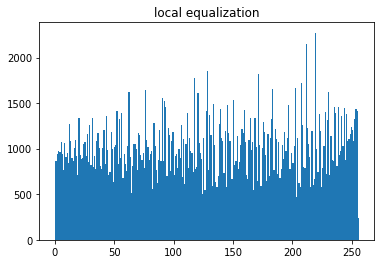

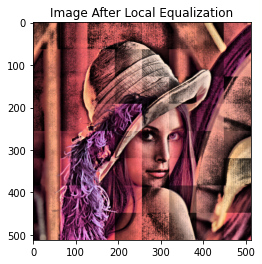

In [33]:
local_hist_v = v.copy()
h_size, w_size = local_hist_v.shape[:2]

h_block = h_size // 64
w_block = w_size // 64

for i in range(h_block):
  for j in range(w_block):
    # TODO ...
    raise NotImplementedError

plt.figure()
plt.hist(local_hist_v.flatten(), range(257))
plt.title("local equalization")
plt.show()

new_hsv = np.concatenate([h, s, local_hist_v], axis=2)
new_img = cv2.cvtColor(new_hsv, cv2.COLOR_HSV2RGB)

plt.figure()
plt.imshow(new_img)
plt.title("Image After Local Equalization")
plt.show()

# Answer
# for i in range(h_block):
#   for j in range(w_block):
#     local_patch = v[64*i: 64*(i+1), 64*j: 64*(j+1), :]
#     equal_patch = EqualHist(local_patch)
#     local_hist_v[64*i: 64*(i+1), 64*j: 64*(j+1), :] = equal_patch


虽然分布是均匀了，但是图片并不好看。。。

## 图片滤波

没有 傅里叶变换 和 卷积 知识的同学可以先看下面两个视屏

Video available at https://youtube.com/watch?v=tEzgtbnbXgQ


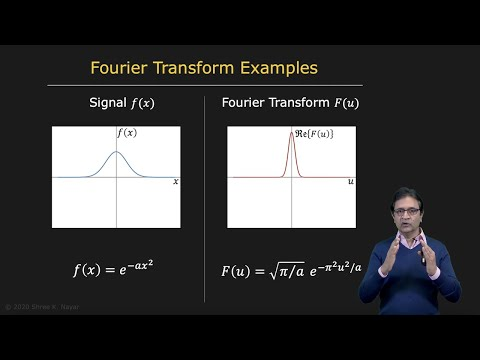

In [34]:
#@title 视频: 傅里叶变换
video = YouTubeVideo(id="tEzgtbnbXgQ", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)

video



## 连通区域

分割出二值化后图像的连通区域

In [21]:
#@markdown Helper Function

def plot_label_img(img, label_mask):
  """
  由 label_mask 给图片上色

  Input:
    img: (np.ndarray) 图像 shape: (H, W)
    label_mask: (np.ndarray) 与图片中像素点一一对应的标签
                 其中 0 为背景
  """

  label2color = {}
  unique_label = np.unique(label_mask[label_mask > 0])
  for l in unique_label:
    label2color[l] = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

  # 背景色为黑色
  h, w = img.shape[:2]
  color_img = np.zeros((h, w, 3), dtype=np.uint8)

  for key, item in label2color.items():
    color_img[np.where(label_mask == key)] = item

  return color_img

In [22]:
#@markdown 下载图片

!gdown --id 1d0WCEtpvy1ZL1Tz3N_m0m2WrsEV4phiW

Downloading...
From: https://drive.google.com/uc?id=1d0WCEtpvy1ZL1Tz3N_m0m2WrsEV4phiW
To: /content/component.png
100% 1.01k/1.01k [00:00<00:00, 879kB/s]


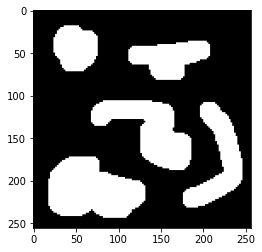

In [23]:
Component = cv2.imread('component.png')
Component = cv2.cvtColor(Component, cv2.COLOR_BGR2GRAY)
_, thresh_Com = cv2.threshold(Component, 125, 1., cv2.THRESH_BINARY)


plt.figure()
plt.imshow(thresh_Com, cmap='gray')
plt.show()

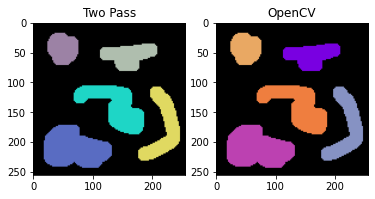

In [24]:
def Two_Pass(img: np.ndarray):
    """
    实现 Two Pass 算法寻找连通区域

    Input:
      img: (np.ndarray) 二值化后的图像 shape: (H, W)
    """
    # 先在上下左右加一个像素的补丁，减少之后的讨论
    pad_img = np.pad(img, ((1, 1), (1, 1)), 'constant', constant_values=0)
    h, w = img.shape
    Imglabel = np.zeros_like(pad_img,  dtype=np.uint32)
    label = 1
    LabelSet = {}
    for i in range(1, h + 1):
        for j in range(1, w + 1):
            if pad_img[i, j] > 0:
                if pad_img[i - 1, j] == 0 and pad_img[i, j - 1] == 0:
                    # 赋值最新的 Label
                    Imglabel[i, j] = label
                    label += 1
                else:
                    # 赋值最小的 Label
                    Neighbor_y = [i - 1, i - 1, i - 1, i, i, i + 1, i + 1, i + 1]
                    Neighbor_x = [j - 1, j, j + 1, j - 1, j + 1, j - 1, j, j + 1]
                    Neighbor_label = Imglabel[Neighbor_y, Neighbor_x]
                    foreground = Neighbor_label[Neighbor_label > 0]
                    # 去掉背景点
                    min_label = np.min(foreground)
                    Imglabel[i, j] = min_label

                    # 记录连通的 Label
                    for l in foreground:
                        if min_label <= LabelSet.get(l, np.inf):
                            while min_label in LabelSet.keys() and min_label != LabelSet[min_label]:
                                min_label = LabelSet[min_label]
                            LabelSet[l] = min_label

    for i in range(1, h + 1):
        for j in range(1, w + 1):
            Imglabel[i, j] = LabelSet.get(Imglabel[i, j], 0)

    return Imglabel[1:h + 1, 1:w + 1]

Label = Two_Pass(thresh_Com)
color_label = plot_label_img(thresh_Com, Label)

# Use OpenCV
_, Label_Opencv = cv2.connectedComponents(thresh_Com)
color_label_OpenCV = plot_label_img(thresh_Com, Label_Opencv)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(color_label)
ax1.set_title("Two Pass")

ax2 = fig.add_subplot(122)
ax2.imshow(color_label_OpenCV)
ax2.set_title("OpenCV")
plt.show()